\begin{center}
Chun-Yuan (Scott) Chiu
\end{center}
\begin{center}
chunyuac@andrew.cmu.edu
\end{center}

# 1. {-}

## (a) {-}

The likelihood function is 
$$
L(\alpha) = \prod_{i=1}^n \frac{\alpha\lambda^\alpha}{X_i^{\alpha+1}}, 
$$
so the log likelihood is
$$
l(\alpha) = \sum_{i=1}^n (\log\alpha + \alpha\log\lambda - (\alpha+1)\log X_i)
$$
and its derivative with respective to $\alpha$
\begin{align*}
\frac{dl}{d\alpha} &= \sum_{i=1}^n \left(\frac{1}{\alpha} + \log\lambda - \log X_i\right)\\
&= \frac{n}{\alpha} + n\log\lambda - \sum_{i=1}^n \log X_i. 
\end{align*}
Setting to zero and solve for $\alpha$, we obtain the MLE
$$
\hat a = \frac{1}{ \frac1n\sum_{i=1}^n \log X_i - \log\lambda}.
$$


## (b) {-}

The Fisher Information is 
\begin{align*}
I(\alpha) &= E\left(-\frac{\partial^2 \log f(X;\alpha)}{\partial \alpha^2}\right)\\
&= E\left(-\frac{\partial^2 }{\partial \alpha^2}( \log\alpha + \alpha\log\lambda - (\alpha+1)\log X) \right)\\
&= E\left(-\frac{\partial }{\partial \alpha}\left(\frac{1}{\alpha} + \log\lambda - \log X\right) \right)\\
&= E\left( \frac{1}{\alpha^2} \right) = \frac{1}{\alpha^2}, 
\end{align*}
so for large $n$, we have the approximation
$$
\hat\alpha \approx N\left(\alpha, \frac1{nI(\alpha)}\right) = N(\alpha, \alpha^2/n).
$$
In practice $\alpha$ is unknown. We can replace $\alpha$ by an estimate given by the MLE $\hat \alpha$. 


## (c) {-}

The distribution of $\alpha$ is approximately $N(\hat\alpha, \hat\alpha^2/n)$. Now given $\lambda=2$ and a sample of size $n=100$ such that $\sum_i\log(x_i) = 107.39$, we have an estimate
$$
\hat\alpha = \frac{1}{ \frac1n\sum_{i=1}^n \log x_i - \log\lambda} = \frac{1}{ \frac{107.39}{100} - \log 2} = 2.626.
$$

In [1]:
from math import log

1/(1.0739 - log(2))

2.626375824269999

Thus the distribution of the MLE $\hat \alpha$ can be approximated by
$$
N(\hat\alpha, \hat\alpha^2/n) = N(2.626, 0.2626^2).
$$
The MLE $\hat\alpha$ is the best estimator for $\alpha$ in the sense that it is asymptotically efficient, meaning its bias vanishes as $n$ goes to infinity (i.e., asymptotic unbiasedness), and among all asymptotically unbiased estimators, it achieves the lowest possible variance. Given the sample data and the above approximation, our best estimate for $\alpha$ is 2.626 and the standard error of the estimator $\hat\alpha$ is approximately 0.2626. 

# 2. {-}

## (a) {-}

The pdf is 
$$
f(x; \theta) = \frac{\beta^\theta}{\Gamma(\theta)}x^{\theta-1}e^{-\beta x}, \quad 0<x<1, \theta, \beta>0, 
$$
so the Fisher Information is
\begin{align*}
I(\theta) &= E\left(-\frac{\partial^2 \log f(X;\theta)}{\partial \theta^2}\right)\\
&= E\left(-\frac{\partial^2 }{\partial \theta^2}(\theta\log\beta + (\theta-1)\log X -\log\Gamma(\theta)-\beta X) \right)\\
&= E\left(\frac{\partial }{\partial \theta}\frac{\Gamma'(\theta)}{\Gamma(\theta)} \right)\\
&= \frac{\Gamma(\theta)\Gamma''(\theta) - (\Gamma'(\theta))^2}{\Gamma^2(\theta)}. 
\end{align*}


## (b) {-}

Let $\theta_0$ be the true value of $\theta$ and $\hat\theta$ its MLE. When $n$ is large, we have approximately 
\begin{align*}
\hat\theta &\approx N\left(\theta_0, \frac{1}{nI(\theta_0)}\right)\\
&= N\left(\theta_0, \frac{\Gamma^2(\theta_0)}{n(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)}\right).
\end{align*}
Since $\theta_0$ is unknown, so is this distribution. It can be thought of as a distribution family. Given a sample data, in order to obtain a distribution we can work with, the best we can do is to numerically find an estimate using the MLE and replace all $\theta_0$ by this estimate. 


## (c) {-}

By the invariance property, the MLE for $\log(\theta)$ is $\log(\hat\theta)$, whose distribution can be approximated by a normal using the Delta Method. 
Let 
$$
\sigma_n = \sqrt{\frac{\Gamma^2(\theta_0)}{n(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)}}. 
$$
Recall that $\Gamma^2(\theta_0)/(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)$ is the second derivative of $\log\Gamma(\theta)$ at $\theta_0$, which is finite given $\theta_0 > 0$. Thus we know that $\sigma_n\downarrow 0$ as $n\rightarrow\infty$.
Since we have 
$$
\frac{\hat\theta - \theta_0}{\sigma_n} \xrightarrow{D} Z, 
$$
where $Z\sim N(0, 1)$, by the Delta Method with $g(x) = 1/x$, we know that $(g'(\theta_0))^2 = 1/\theta_0^2$ and 
$$
\log(\hat\theta) \approx N\left(\log(\theta_0), \frac{\Gamma^2(\theta_0)}{n\theta_0^2(\Gamma(\theta_0)\Gamma''(\theta_0) - (\Gamma'(\theta_0))^2)}\right). 
$$
Again here $\theta_0$ is unknown. Given a sample data we can replace it by a maximum likelihood estimate to obtain a workable distribution.



# 3. {-}

## (a) {-}

By the invariance property, the MLE for the odds is 
$$
\frac{\hat p}{1-\hat p}.
$$

## (b) {-}

Let $Y_1, Y_2, \ldots, Y_n$ be i.i.d. from the $\text{Bernoulli}(p)$ distribution. We can write $X = \sum_{i=1}^n Y_i$ and $\hat p = \bar Y$. We also have
\begin{align*}
E(\hat p) &= E(\bar Y) = E(Y_i) = p, \\
V(\hat p) &= V(\bar Y) = V\left(\sum_{i=1}^n Y_i/n\right) = V(Y_i)/n = p(1-p)/n.
\end{align*}
By the CLT, we know that
$$
\frac{\hat p - p}{\sqrt{\frac{p(1-p)}{n}}} \xrightarrow{D} Z. 
$${-}
We want to apply the Delta Method with $g(x) = x/(1-x)$, which requires $g'(p)\neq 0$ and $\sigma_n = \sqrt{p(1-p)/n} \downarrow 0$ as $n\rightarrow\infty$. This is true for all $0<p<1$. We know that 
$$ 
g'(p) = \frac{(1-p)+p}{(1-p)^2} = \frac{1}{(1-p)^2}
$$
and that by the Delta Method
\begin{align*}
\frac{\hat p}{1-\hat p}&\approx N(g(p), (g'(p))^2\sigma_n^2)\\
&= N\left(\frac{p}{1-p}, \frac{1}{(1-p)^4}\frac{p(1-p)}{n}\right)\\
&= N\left(\frac{p}{1-p}, \frac{p}{n(1-p)^3}\right).
\end{align*}
To obtain a workable distribution, plug in $p=\hat p$. 


## (c) {-}

Given the above approximation (the one before plugging in $p=\hat p$), we have
$$
P\left(\frac{\Big| \frac{\hat p}{1-\hat p} - \frac{p}{1-p}  \Big|}{\sqrt{\frac{p}{n(1-p)^3}}} < Z_{\alpha/2}\right) = 1-\alpha, 
$$
where $Z_{\alpha/2}$ is the $100(1-\frac{\alpha}{2})$ percentile point of the standard normal distribution. Hence the confidence interval is
$$
\frac{p}{1-p} \in \left[\frac{\hat p}{1-\hat p}-Z_{\alpha/2}\sqrt{\frac{p}{n(1-p)^3}}, \frac{\hat p}{1-\hat p} + Z_{\alpha/2}\sqrt{\frac{p}{n(1-p)^3}}\right]
$$
Again this interval has an unknown $p$. To obtain a workable interval we plug in $p=\hat p$ and get
$$
\left[\frac{\hat p}{1-\hat p}-Z_{\alpha/2}\sqrt{\frac{\hat p}{n(1-\hat p)^3}}, \frac{\hat p}{1-\hat p} + Z_{\alpha/2}\sqrt{\frac{\hat p}{n(1-\hat p)^3}}\right].
$$


## (d) {-}

We look at the 95% confidence intervals. As the simulation results shown below, only around 65% of the 100,000 sample confidence intervals cover the true value of $p$, not 95%. The bar chart at the bottom shows the first 100 sample confidence intervals. The missing bars are intervals with length 0, which are simulation results with $\hat p=0$. With $p=0.1$ it is understandable that a sample value $\hat p=0$ is not uncommon. Indeed, since the "rules of thumb" $np\geq 5, n(1-p)\geq 5$ are not satisfied, the CLT approximation applied in (b) is not expected to be accurate. So a simulation result like the below is to be expected. 

In [2]:
from scipy.stats import norm, binom
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

n = 10
p = 0.1
alpha = 5
sampleSize = 100000
z = norm.ppf(1 - alpha/100/2)

phat = binom.rvs(n, p, size=sampleSize)/n
l = phat/(1-phat) - z*np.sqrt(phat/(n*(1-phat)**3))
r = phat/(1-phat) + z*np.sqrt(phat/(n*(1-phat)**3))
p = np.full(sampleSize, p)

((l < p) & (p < r)).sum()/sampleSize

0.65566

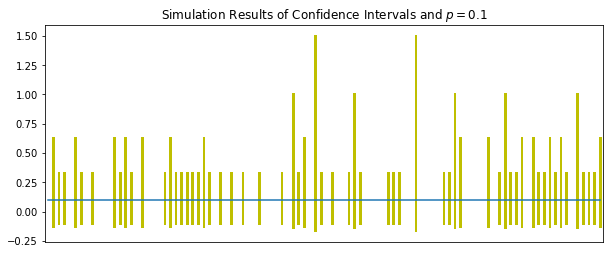

In [3]:
ax = DataFrame([l, r]).T.head(100).plot(kind='bar', stacked=True, legend=None, color='y')
ax = DataFrame(p).head(100).plot(ax=ax, legend=None, figsize=(10, 4))
ax.set_xticks([])
ax.set_title("Simulation Results of Confidence Intervals and $p=0.1$")
plt.show()
